In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [190]:
boston = load_boston()
df = pd.DataFrame(boston.data)

In [191]:
df.columns = boston.feature_names

In [192]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [193]:
df['Price'] = boston.target

In [194]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [195]:
#df['CRIM'] = df['CRIM'].apply(np.log)

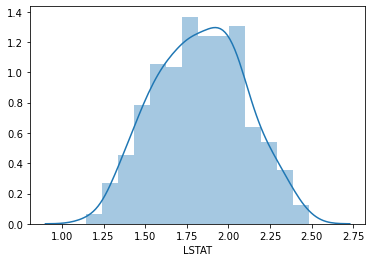

In [196]:
df['LSTAT'] = df['LSTAT'].apply(np.sqrt)
sns.distplot(df['LSTAT'].apply(np.sqrt))

In [155]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,3.417673,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,0.987167,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.315295,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,2.636277,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,3.370459,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,4.117645,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,6.161980,50.000000


In [156]:
df['ZN'] = df['ZN'].replace(0,df['ZN'].mean())

In [157]:
quantile1,quantile3 = np.percentile(df['B'],[25,75])
print(quantile1)
print(quantile3)

375.3775
396.225


In [158]:
iqr = quantile3-quantile1
print(iqr)

20.847500000000025


In [159]:
lower = quantile1 - (3 * iqr)
print(lower)

312.8349999999999


In [160]:
#df.loc[df['B']<312,'B'] = 312
# We are not removing outliers in this case since the model accuracy decreased by 5%

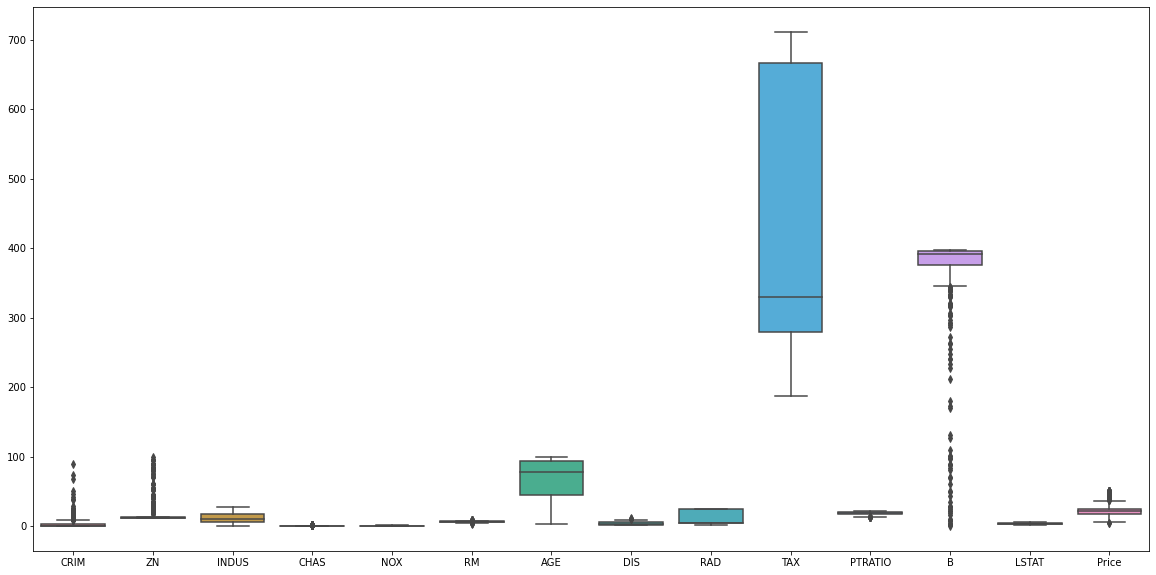

In [161]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df,ax=ax)

C:\Users\Mahe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


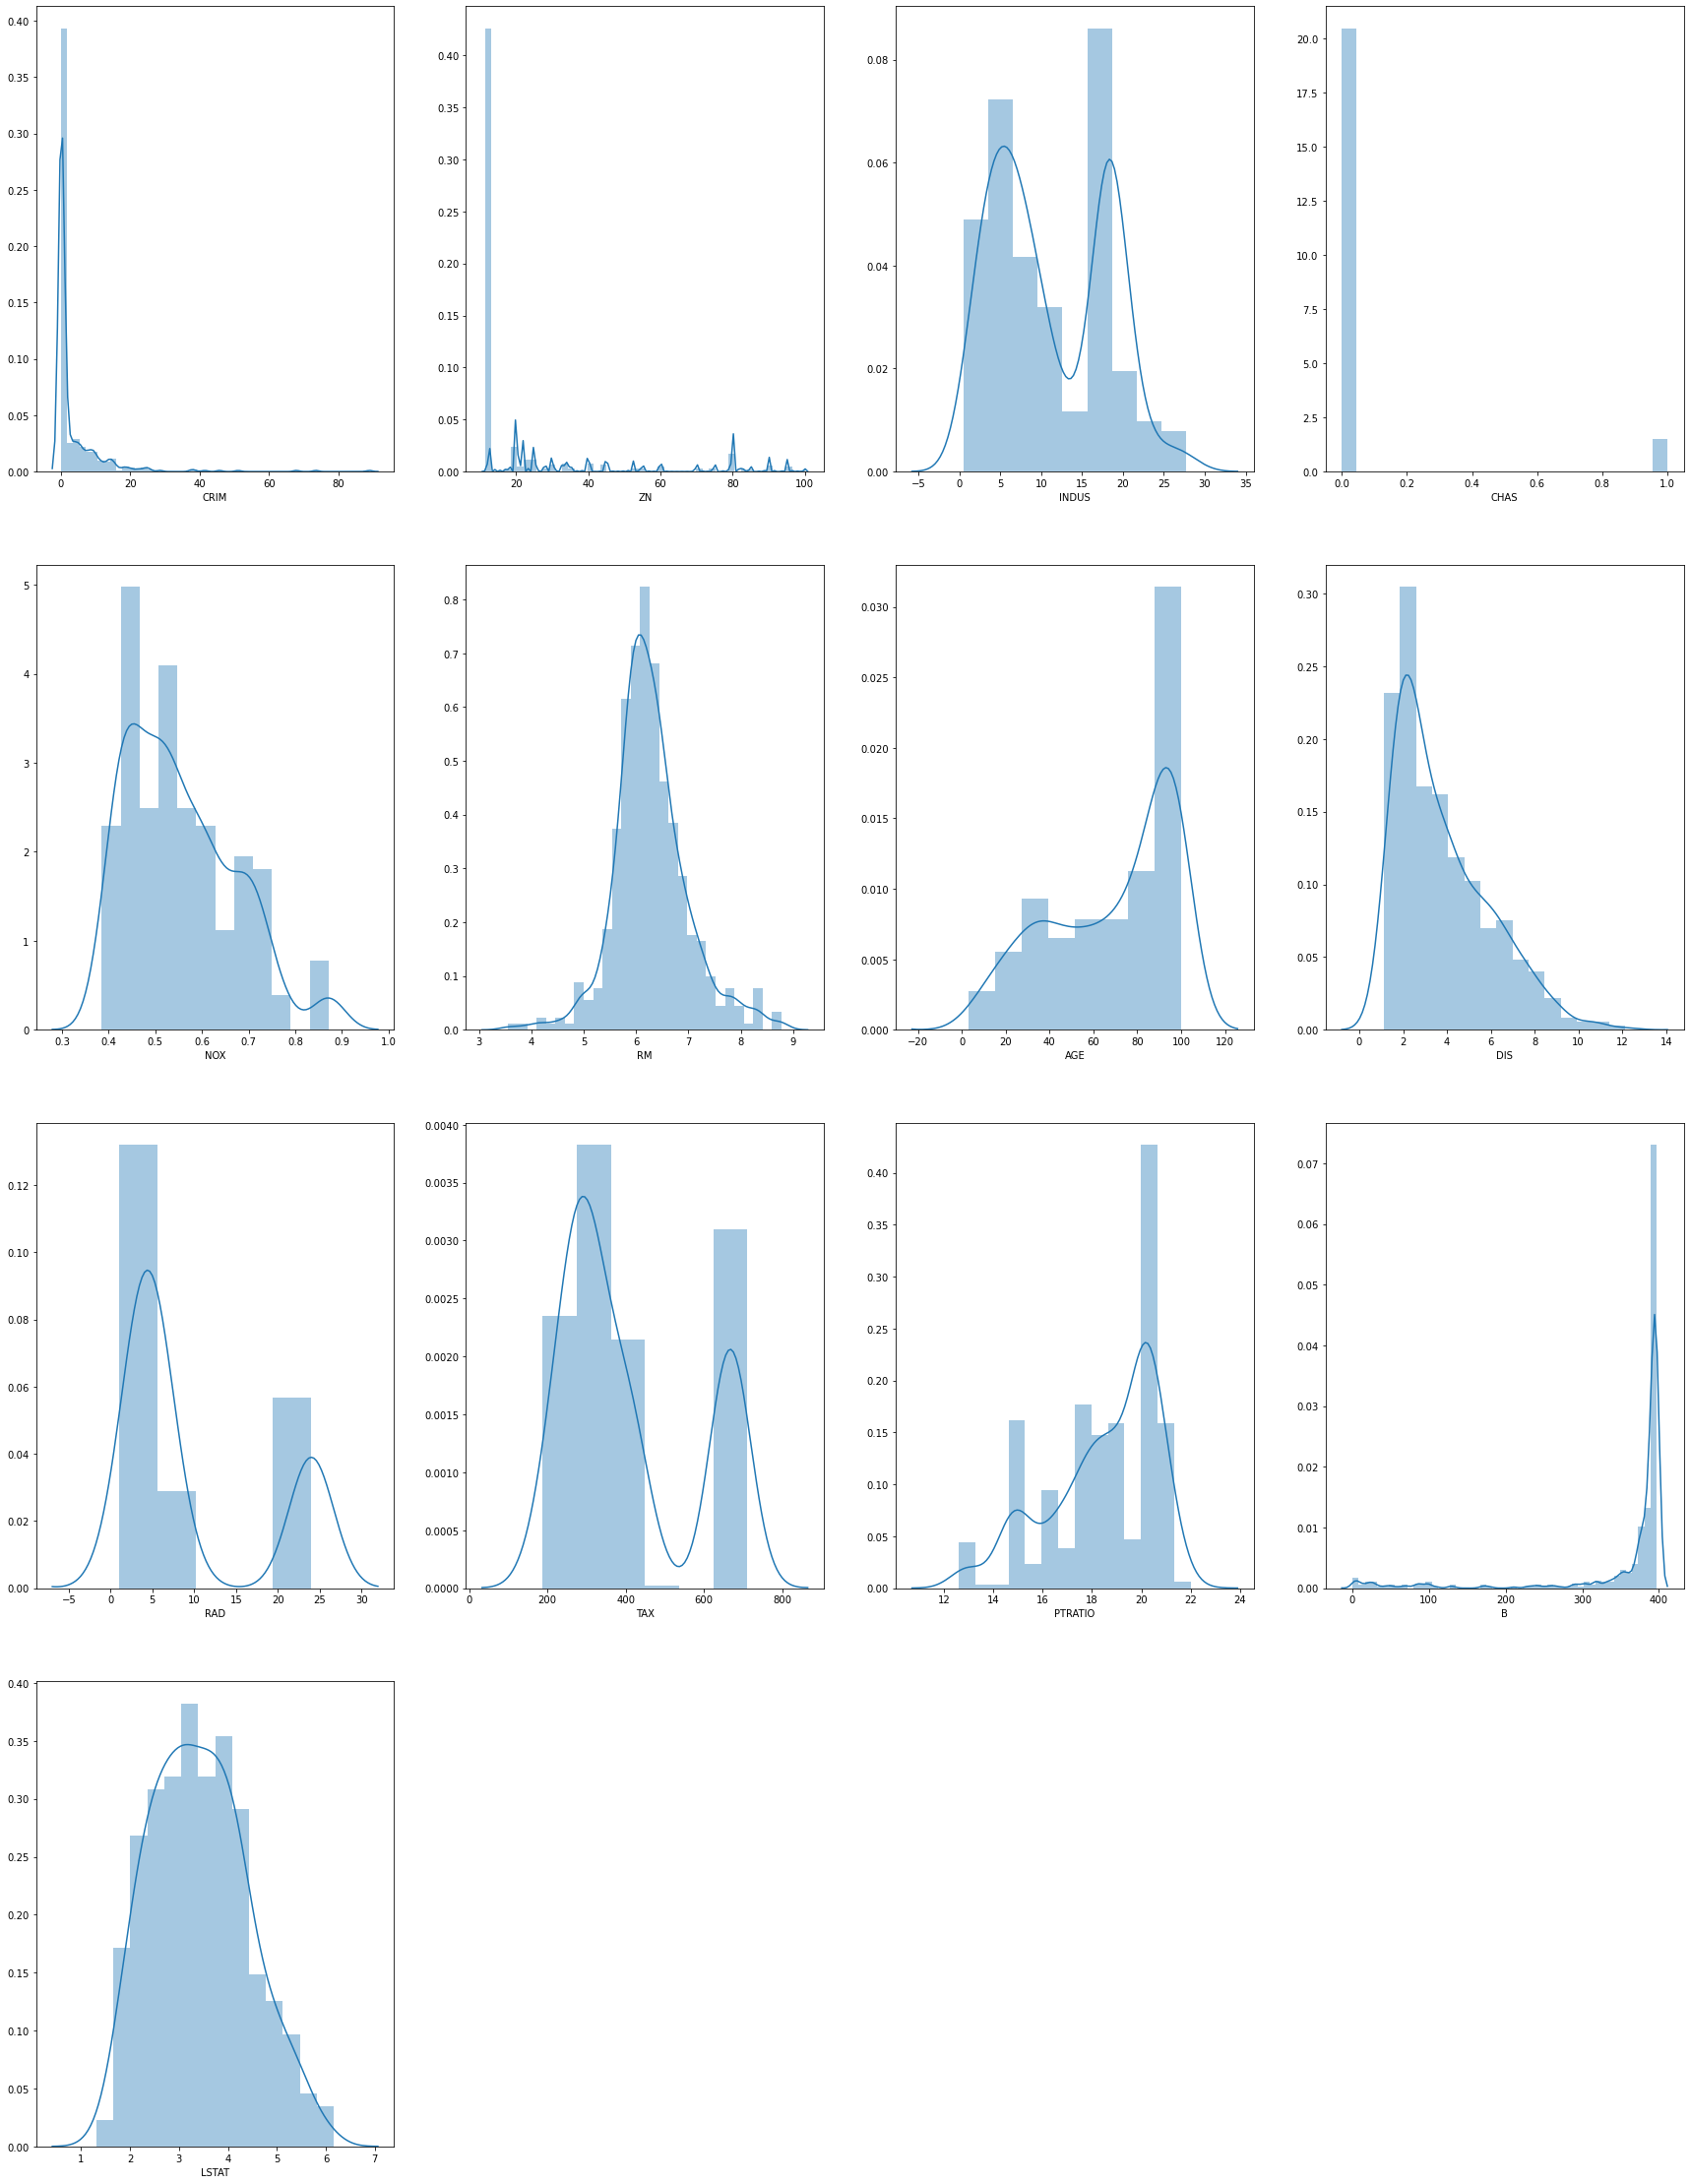

In [162]:
#Visualizing distribution of the data
count = 1
plt.figure(figsize=(30,40))
for i in range(13):
    plt.subplot(4,4,count)
    sns.distplot(df.iloc[:,i])
    count=count+1
plt.show()

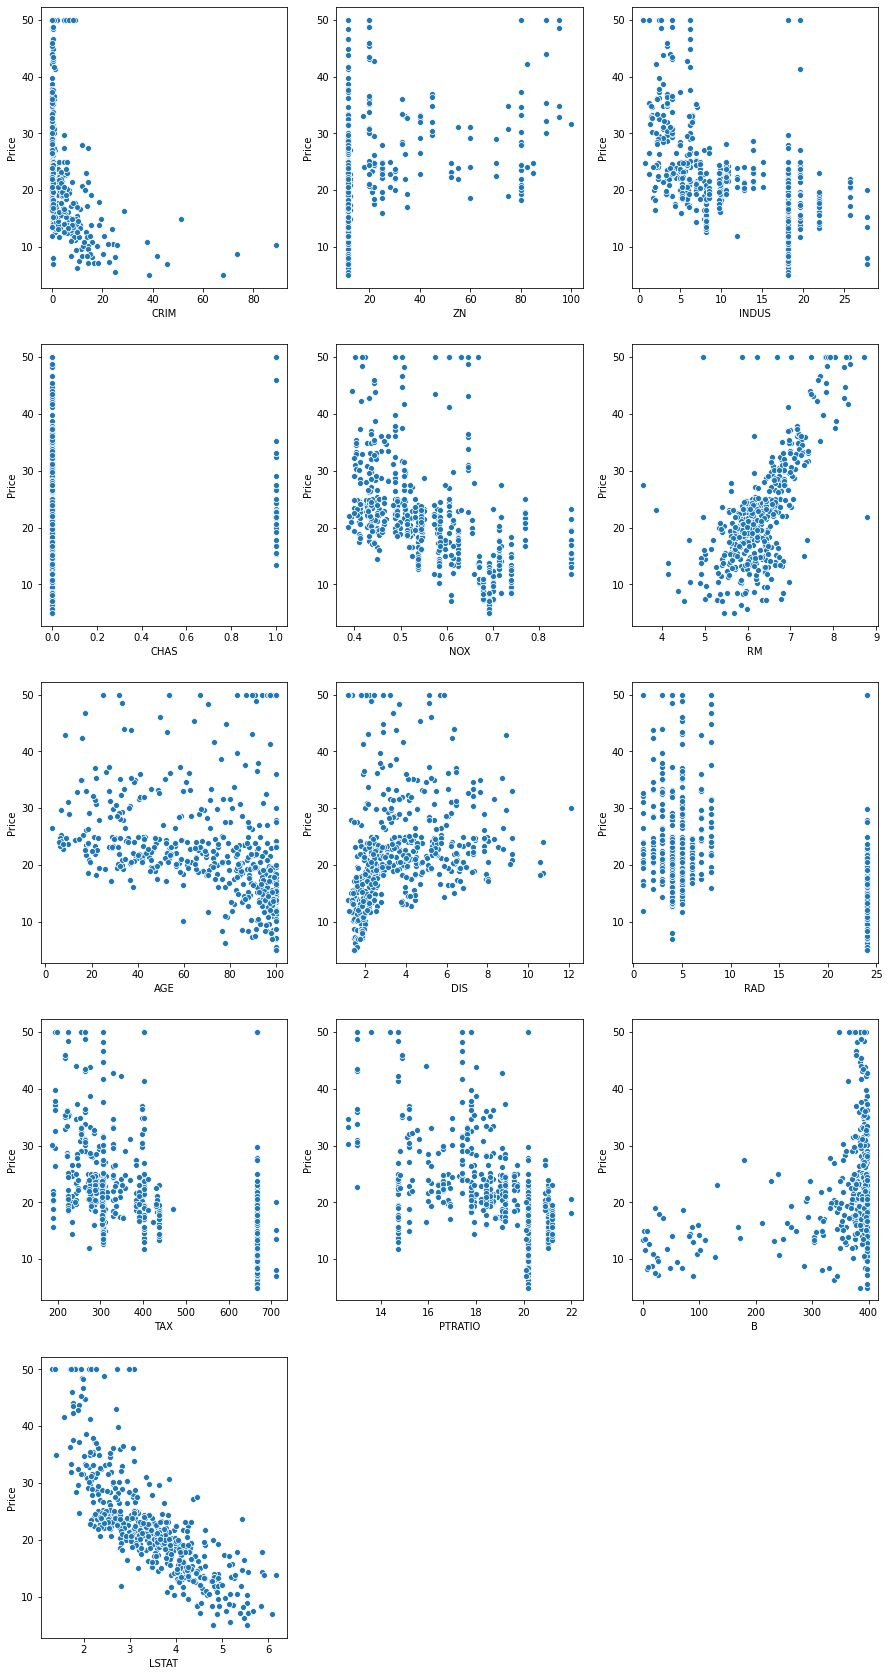

In [163]:
count = 1
plt.figure(figsize=(15,30))
for i in range(13):
    plt.subplot(5,3,count)
    sns.scatterplot(x= df.iloc[:,i], y= 'Price',data=df)
    count=count+1
plt.show()

In [164]:
x = df.iloc[:,0:13]
y = df['Price']

In [165]:
#StatsModel
import statsmodels.api as sm 
x = sm.add_constant(x)

In [166]:
model = sm.OLS(y,x).fit()

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     125.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          3.97e-147
Time:                        17:14:05   Log-Likelihood:                -1469.6
No. Observations:                 506   AIC:                             2967.
Df Residuals:                     492   BIC:                             3026.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8520      5.063      9.648      0.000      38.904      58.800
CRIM          -0.1121      0.031     -3.631      0.000      -0.173      -0.051
ZN             0.0427      0.015      2.932      0.004       0.014       0.071
INDUS          0.0266      0.058      0.458      0.647      -0.087       0.140
CHAS           2.4058      0.814      2.955      0.003       0.806       4.005
NOX          -16.8707      3.607     -4.677      0.000     -23.958      -9.784
RM             3.0023      0.406      7.387      0.000       2.204       3.801
AGE            0.0181      0.013      1.429      0.154      -0.007       0.043
DIS           -1.3339      0.185     -7.203      0.000      -1.698      -0.970
RAD            0.3124      0.063      4.970      0.000       0.189       0.436
TAX           -0.0122      0.004     -3.414      0.001      -0.019      -0.005
PTRATIO       -0.9250      0.122     -7.606      0.000      -1.164      -0.686
B              0.0082      0.003      3.221      0.001       0.003       0.013
LSTAT         -4.9047      0.366    -13.390      0.000      -5.624      -4.185
==============================================================================
Omnibus:                      150.473   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.698
Skew:                           1.304   Prob(JB):                    3.98e-128
Kurtosis:                       7.585   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
#In the above model INDUS and Age features has p value more than 0.05 hence we can drop them
#Lets check model summary after dropping them
x = df.drop(['INDUS','AGE','Price'],axis=1)
y = df['Price'] 
x = sm.add_constant(x)

In [169]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     148.5
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          8.15e-149
Time:                        17:14:05   Log-Likelihood:                -1470.8
No. Observations:                 506   AIC:                             2966.
Df Residuals:                     494   BIC:                             3016.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.7087      5.006      9.530      0.000      37.872      57.545
CRIM          -0.1120      0.031     -3.631      0.000      -0.173      -0.051
ZN             0.0399      0.014      2.766      0.006       0.012       0.068
CHAS           2.5124      0.808      3.107      0.002       0.924       4.101
NOX          -15.1125      3.354     -4.506      0.000     -21.703      -8.522
RM             3.1240      0.393      7.947      0.000       2.352       3.896
DIS           -1.4352      0.171     -8.393      0.000      -1.771      -1.099
RAD            0.2974      0.060      4.941      0.000       0.179       0.416
TAX           -0.0113      0.003     -3.524      0.000      -0.018      -0.005
PTRATIO       -0.9046      0.120     -7.530      0.000      -1.141      -0.669
B              0.0084      0.003      3.315      0.001       0.003       0.013
LSTAT         -4.6970      0.339    -13.863      0.000      -5.363      -4.031
==============================================================================
Omnibus:                      157.162   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.061
Skew:                           1.348   Prob(JB):                    1.39e-140
Kurtosis:                       7.824   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

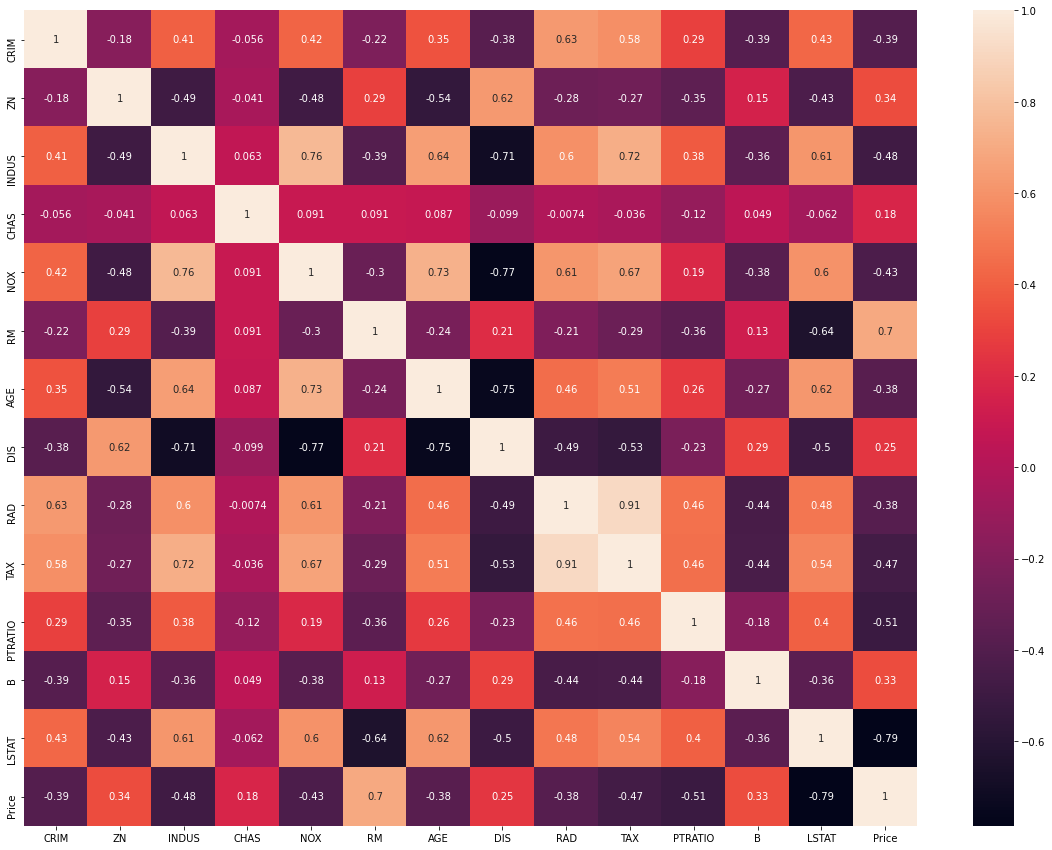

In [170]:
#Now Lets check for multicollinearity
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [171]:
#Now lets see which features has correlation more than 90% by creating a function

def correlation(data,threshold):
    corr_matrix = data.corr()
    l = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                matrix_value = corr_matrix.columns[i]
                l.append(matrix_value)
    return l

In [172]:
correlation(df,0.9)

['TAX']

In [197]:
x = df.drop(['INDUS','AGE','Price','CRIM'],axis=1)
y = df['Price']
#x = sm.add_constant(x)

In [198]:
#model = sm.OLS(y,x).fit()
#model.summary()

In [199]:
x.head()

,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,2.231591
1,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,3.023243
2,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,2.007486
3,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,1.714643
4,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,2.308679


In [200]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [202]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [203]:
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

Linear Regression

In [204]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [205]:
linear.score(x_train,y_train)

0.9108330345856661

In [206]:
linear.score(x_test,y_test)

0.7661866594922747

Lasso

In [208]:
from sklearn.linear_model import Lasso,LassoCV
lass = LassoCV(cv=10)
lass.fit(x_train,y_train)

C:\Users\Mahe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7276773317289553, tolerance: 2.670514666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Mahe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.422397502440617, tolerance: 2.670514666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Mahe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.291129692795039, tolerance: 2.8909629685534592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Mahe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Conv

LassoCV(cv=10)

In [209]:
lass.alpha_

0.016512215611502578

In [210]:
model2 = Lasso(alpha=lass.alpha_)
model2.fit(x_train,y_train)

Lasso(alpha=0.016512215611502578)

In [211]:
model2.score(x_train,y_train)

0.9041126007939833

In [212]:
model2.score(x_test,y_test)

0.8090583596736982

In [214]:
model2.predict(poly.fit_transform(scale.fit_transform([[18.000000,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,2.231591]])))

array([21.1124435])

Ridge

In [215]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [216]:
param = {'alpha':np.random.randint(0,10,size=20)}

In [217]:
model1 = Ridge()
ridge_regression = GridSearchCV(model1,param,cv=10)
ridge_regression.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1, 4, 8, 6, 5, 4, 6, 1, 3, 0, 6, 1, 5, 9, 5, 9, 8, 1, 1, 2])})

In [218]:
ridge_regression.score(x_train,y_train)

0.9022949657979734

In [219]:
ridge_regression.score(x_test,y_test)

0.8077536771562791

In [220]:
ridge_regression.predict(poly.fit_transform(scale.fit_transform([[0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,2.007486]])))

array([21.21506936])

Elastic Net

In [221]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [222]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.020263484774157042)

In [223]:
elasticnet_reg.score(x_test, y_test)

0.8082079840964639

In [225]:
elasticnet_reg.predict(poly.fit_transform(scale.fit_transform([[11.36,0,0.63,4.97,1.33,24,666,20.2,375,1.8]])))

array([21.18000246])

In [51]:
import pickle

In [52]:
filename = 'finalized_model.pickle'
pickle.dump(model2, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(poly.transform(scale.fit_transform([[11.36,0,0.63,4.97,1.33,24,666,20.2,375,1.8]])))

In [54]:
a

array([21.15984982])